In [1]:
# need to import cfplot before cf due to issues with matplotlib and esmpy
import cfplot as cfp
import cf
import numpy as np

In [2]:
# change to your suite-id to pick up the required file
runid='du516'
# time points and pseudo-levels to select
# 2nd time point (02:00:00)
tlev=cf.hour(cf.eq(2))
# 3rd pseudo-level, remembering that python starts counting at 0
pslev=2

In [3]:
datafile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/atmos/atmosa.pl19810901_00'
aoddata=cf.read(datafile,  select=['stash_code=2285','stash_code=2300','stash_code=2301','stash_code=2302','stash_code=2303','stash_code=2304','stash_code=2305'])
aaoddata=cf.read(datafile, select=['stash_code=2585','stash_code=2240','stash_code=2241','stash_code=2242','stash_code=2243','stash_code=2244','stash_code=2245'])

In [4]:
# create a field to hold the AOD
aod=aoddata[0].subspace(**{'id%UM_pseudolevel': [pslev]}, T=tlev).squeeze().copy()
# initialise the field to zero prior to the sum
aod.data=np.zeros(aod.data.shape)

In [5]:
# create a field to hold the AAOD
aaod=aaoddata[0].subspace(**{'id%UM_pseudolevel': [pslev]}, T=tlev).squeeze().copy()
# initialise the field to zero prior to the sum
aaod.data=np.zeros(aaod.data.shape)

In [6]:
# create a field to hold the SSA, and set the required variable names
ssa=aod.copy()
# initialise the field to zero
ssa.data=np.zeros(ssa.data.shape)
ssa.nc_set_variable('aerssa550')
ssa.set_property('standard_name','single_scattering_albedo_in_air_due_to_ambient_aerosol_particles')
ssa.set_property('long_name','single scattering albedo in air due to ambient aerosol particles')

In [7]:
# sum-up the various components of AOD
for f in aoddata:
    ff=f.subspace(**{'id%UM_pseudolevel': [pslev]}, T=tlev).squeeze()
    aod.data=aod.data+ff.data

In [8]:
# sum-up the various components of AAOD
for f in aaoddata:
    ff=f.subspace(**{'id%UM_pseudolevel': [pslev]}, T=tlev).squeeze()
    aaod.data=aaod.data+ff.data

In [9]:
# calculate the SSA
ssa.data = 1.0 - (aaod.data/aod.data)

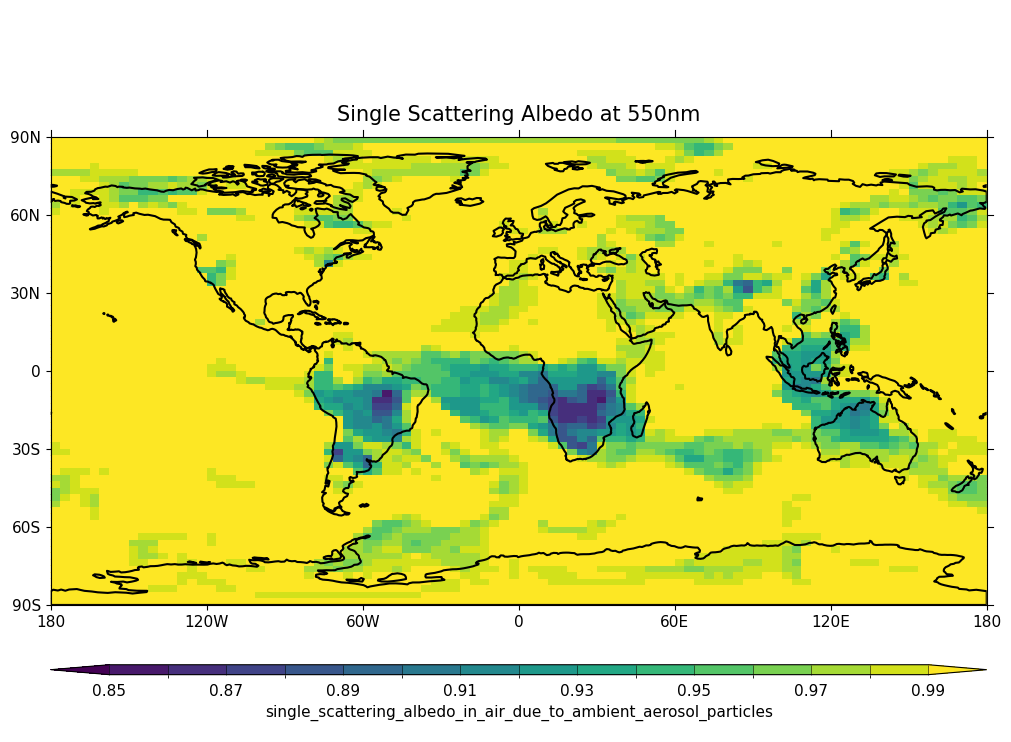

In [10]:
# plot the SSA
cfp.con(ssa, blockfill_fast=True, lines=False, title='Single Scattering Albedo at 550nm')

In [11]:
# save the AOD field in NetCDF format
cf.write(ssa, '/home/vagrant/cf_Task063_SSA.nc', fmt='NETCDF4')